## Individual Models for Each Intersection 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('traffic_weather.csv')

In [3]:
# print values in intersection column
data['Intersection Name'].unique()

array(['Azie MortonBarton Springs', 'BURNETPALM WAY', 'BurnetRutland',
       'CONGRESSBARTON SPRINGS', 'CongressJohanna', 'LAMARCOLLIER',
       'LAMARMANCHACA', 'LAMARSANDRA MURAIDA', 'LAMARSHOALCREEK',
       'LAMARZENNIA', 'LOOP 360CEDAR', 'LOOP 360LAKEWOOD',
       'LOOP 360WALSH TARLTON', 'N Lamar15th'], dtype=object)

In [4]:
# LAG VARIABLE

# date to datetime
data['Full Date'] = pd.to_datetime(data['Full Date'])

# sort to properly apply lags 
data = data.sort_values(by=['Intersection Name', 'Direction', 'Full Date'])

# group by so there is no circular dependency
data['Lag_Traffic'] = data.groupby(['Intersection Name', 'Direction'])['Volume'].shift(8)

data.head()


,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature,Lag_Traffic
27876,Azie MortonBarton Springs,8,18,2017,12,5,0,NB,19.0,424.0,2017-08-18 12:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,36.440128,NaN
27874,Azie MortonBarton Springs,8,18,2017,13,5,0,NB,17.0,492.0,2017-08-18 13:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,37.449261,NaN
27872,Azie MortonBarton Springs,8,18,2017,14,5,0,NB,20.0,397.0,2017-08-18 14:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN
27870,Azie MortonBarton Springs,8,18,2017,15,5,0,NB,21.0,364.0,2017-08-18 15:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.300000,NaN
27868,Azie MortonBarton Springs,8,18,2017,16,5,0,NB,20.0,328.0,2017-08-18 16:00:00,8/18/17,31.3,25.6,38.3,0.0,0,7.9,38.083629,NaN


In [5]:
# create seperat data frame for congress and barton springs intersection
df4 = data[data['Intersection Name'] == 'CONGRESSBARTON SPRINGS']


In [6]:
# print intersection names
data['Intersection Name'].unique()

array(['Azie MortonBarton Springs', 'BURNETPALM WAY', 'BurnetRutland',
       'CONGRESSBARTON SPRINGS', 'CongressJohanna', 'LAMARCOLLIER',
       'LAMARMANCHACA', 'LAMARSANDRA MURAIDA', 'LAMARSHOALCREEK',
       'LAMARZENNIA', 'LOOP 360CEDAR', 'LOOP 360LAKEWOOD',
       'LOOP 360WALSH TARLTON', 'N Lamar15th'], dtype=object)

# Modeling Congress Barton Springs Intersection

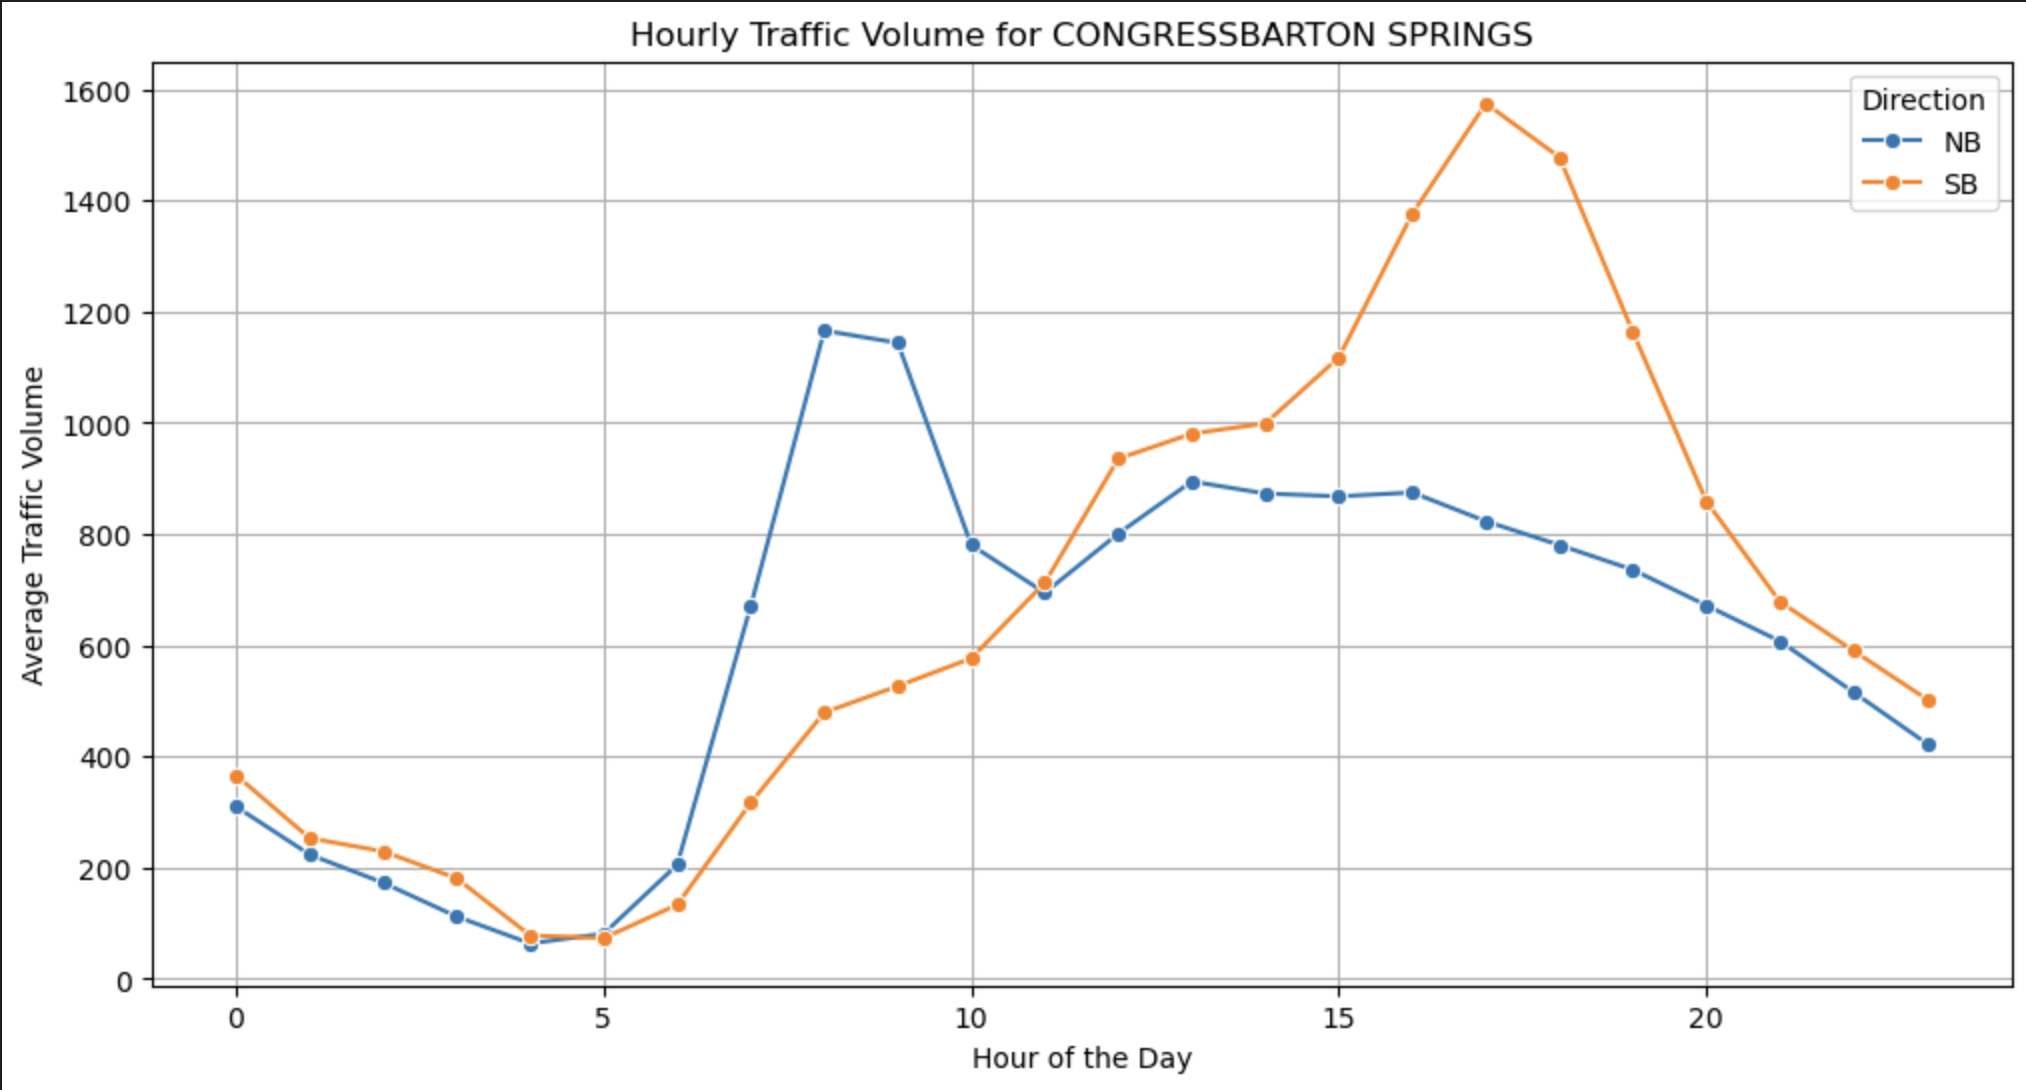

In [7]:
df4.isna().sum()

Intersection Name     0
Month                 0
Day                   0
Year                  0
Hour                  0
Day of Week           0
Holiday               0
Direction             0
Speed                 0
Volume                0
Full Date             0
date                  0
tavg                  0
tmin                  0
tmax                  0
prcp                  0
snow                  0
wspd                  0
temperature           0
Lag_Traffic          16
dtype: int64

In [8]:
# drop the 16 rows where lag isnt filled in yet (2 directions x 8 hours)
df4 = df4.dropna()
df4.isna().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
temperature          0
Lag_Traffic          0
dtype: int64

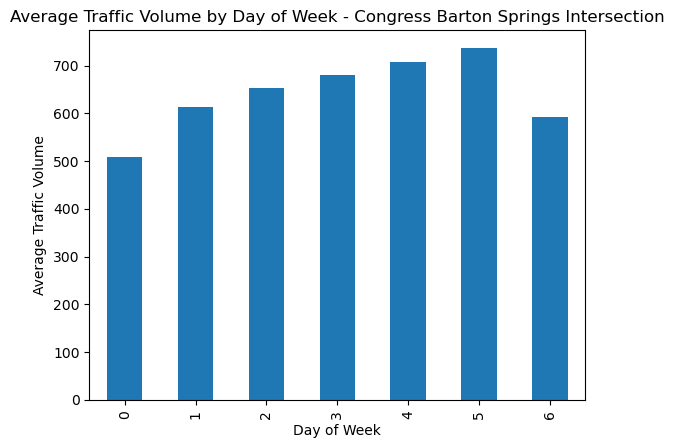

In [9]:
# plot average traffic volume by day of week
df4.groupby('Day of Week')['Volume'].mean().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of Week - Congress Barton Springs Intersection')
plt.show()

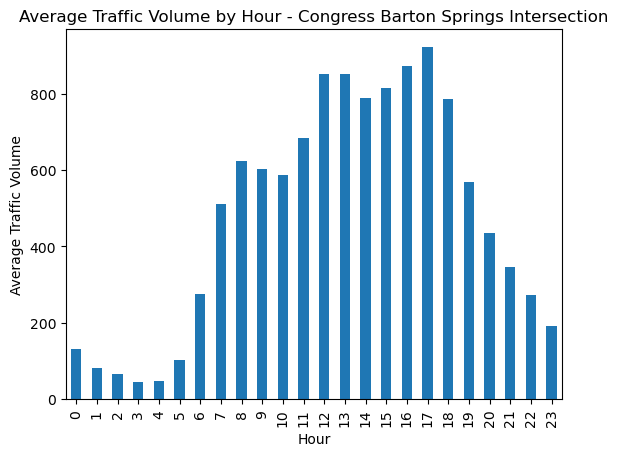

In [49]:
# plot average traffic volume by hour
df4.groupby('Hour')['Volume'].mean().plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour - Congress Barton Springs Intersection')
plt.show()

In [11]:
df4 = df4.drop(['Full Date', 'date', 'tavg', 'tmin', 'tmax', 'Intersection Name'], axis=1)
df4.head()

,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
162294,7,26,2017,22,3,0,NB,33.0,424.0,0.0,0,9.0,30.714149,641.0
162292,7,26,2017,23,3,0,NB,34.0,314.0,0.0,0,9.0,29.050000,643.0
162290,7,27,2017,0,4,0,NB,34.0,185.0,0.0,0,7.6,26.169922,707.0
162288,7,27,2017,1,4,0,NB,35.0,120.0,0.0,0,7.6,24.938303,598.0
162286,7,27,2017,2,4,0,NB,34.0,52.0,0.0,0,7.6,24.164075,645.0


In [12]:
label_encoder = LabelEncoder()
df4['Direction'] = label_encoder.fit_transform(df4['Direction'])

In [13]:
df4.head()

,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
162294,7,26,2017,22,3,0,0,33.0,424.0,0.0,0,9.0,30.714149,641.0
162292,7,26,2017,23,3,0,0,34.0,314.0,0.0,0,9.0,29.050000,643.0
162290,7,27,2017,0,4,0,0,34.0,185.0,0.0,0,7.6,26.169922,707.0
162288,7,27,2017,1,4,0,0,35.0,120.0,0.0,0,7.6,24.938303,598.0
162286,7,27,2017,2,4,0,0,34.0,52.0,0.0,0,7.6,24.164075,645.0


In [14]:
X = df4.drop('Volume', axis=1)
y = df4['Volume']

In [15]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    bootstrap=True,          # Use bootstrapped samples for training
    random_state=42          # Random seed for reproducibility
)

In [18]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf_regressor.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RF Mean Squared Error: {mse}")
print(f"RF Root Mean Squared Error: {rmse}")
print(f"RF R-squared: {r2}")

RF Mean Squared Error: 8778.013240836744
RF Root Mean Squared Error: 93.69105208522714
RF R-squared: 0.9586922800211919


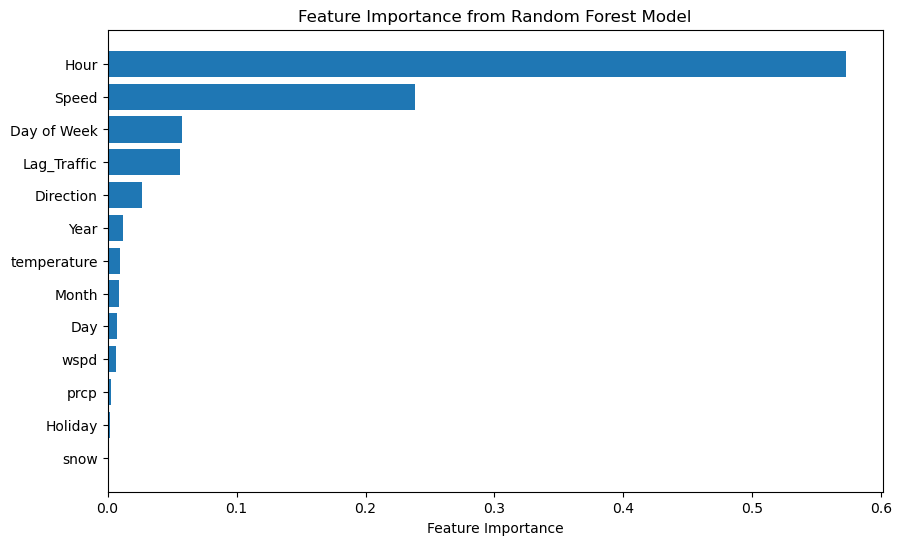

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance and feature names
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importance values and corresponding feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


# Linear Tree

In [22]:
from lineartree import LinearTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from lineartree import LinearForestRegressor

In [23]:
# Split features: Categorical features for logical splitting
categorical_features = ['Holiday', 'Direction']

split_features = ['Day of Week', 'Hour']

# Linear features: Continuous features for linear modeling
linear_features = ['Speed', 'prcp', 'snow', 'wspd', 'Hour', 'Day of Week', 'temperature', 'Lag_Traffic']

In [24]:
# Map feature names to indices for split_features and linear_features
categorical_features_indices = [X.columns.get_loc(feature) for feature in categorical_features]
split_feature_indices = [X.columns.get_loc(feature) for feature in split_features]
linear_feature_indices = [X.columns.get_loc(feature) for feature in linear_features]

In [25]:
# Step 3: Initialize and Train the LinearTreeRegressor
# Base estimator is LinearRegression
linear_tree = LinearTreeRegressor(
    base_estimator=LinearRegression(),
    criterion="rmse",              # Use RMSE for split quality
    max_depth= 20,                   # Limit tree depth to prevent overfitting
    min_samples_split=10,          # Minimum samples to allow a split
    min_samples_leaf=200,            # Minimum samples in a leaf
    split_features=split_feature_indices,  # Features to use for splits
    linear_features=linear_feature_indices, # Features to use in the linear models
    categorical_features=categorical_features_indices
)

In [26]:
# Train the model
linear_tree.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[5, 6], criterion='rmse',
                    linear_features=[7, 8, 9, 10, 3, 4, 11, 12], max_depth=20,
                    min_samples_leaf=200, min_samples_split=10,
                    split_features=[4, 3])

In [27]:
# Step 4: Evaluate the Model
# Predict on the test set
y_pred = linear_tree.predict(X_test)
y_pred_linear_tree = linear_tree.predict(X_test)

In [28]:
# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R^2: {r2}")

Test RMSE: 171.26525006123344
Test R^2: 0.8619699965919099


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:

hour_feature = X_test[:, split_feature_indices[1]] 

# Create a DataFrame for easier plotting
import pandas as pd
plot_df = pd.DataFrame({
    'Hour': hour_feature,
    'Actual': y_test,
    'Predicted': y_pred_linear_tree
})

# group by hour to get mean volume per hour 
plot_df_grouped = plot_df.groupby('Hour').mean().reset_index()


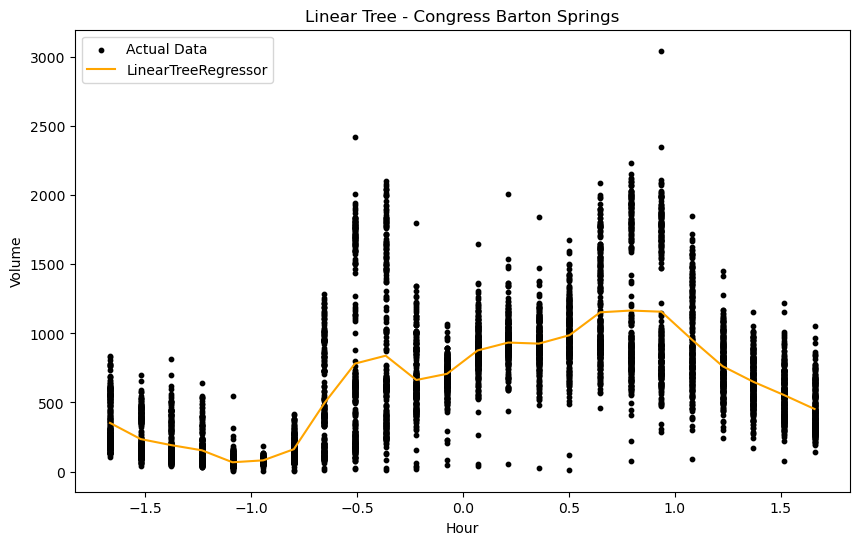

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(plot_df['Hour'], plot_df['Actual'], c='black', s=10, label='Actual Data')

# Line plot for predicted values
plt.plot(plot_df_grouped['Hour'], plot_df_grouped['Predicted'], color='orange', label='LinearTreeRegressor')

plt.title('Linear Tree - Congress Barton Springs')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.legend()
plt.show()


<ErrorbarContainer object of 3 artists>

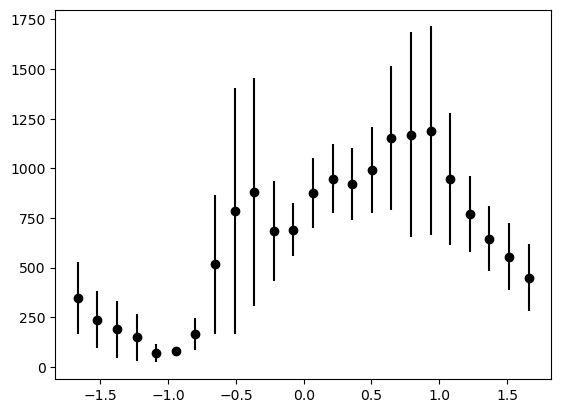

In [31]:
# Calculate standard deviation of 'Actual' for error bars
plot_df_grouped['Std'] = plot_df.groupby('Hour')['Actual'].std().values

# Add error bars
plt.errorbar(
    plot_df_grouped['Hour'], plot_df_grouped['Actual'],
    yerr=plot_df_grouped['Std'], fmt='o', color='black', label='Actual Data (Std Dev)'
)


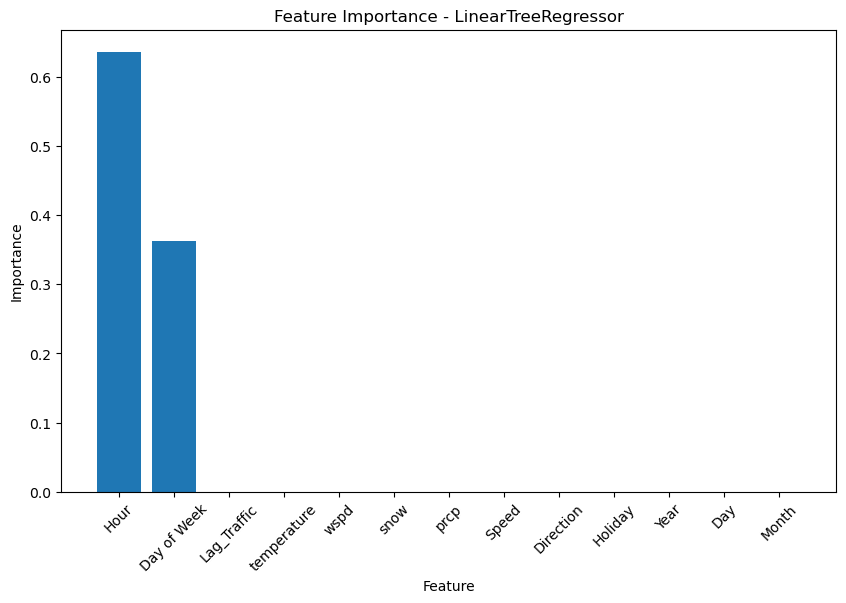

In [90]:
# plot feature importance
feature_importance = linear_tree.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - LinearTreeRegressor')
plt.xticks(rotation=45)
plt.show()

# Linear Forest

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from lineartree import LinearForestRegressor
import numpy as np


Best Parameters: {'base_estimator__alpha': 10.0, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 300}
Test RMSE with Best Parameters: 112.57598262643245

In [33]:
# Initialize LinearForestRegressor
linear_forest = LinearForestRegressor(
    base_estimator=Ridge(alpha=10.0),  # ridge as base
    n_estimators=300,                 # num trees
    max_features = None,
    max_depth=20,                    
    min_samples_split=20,          
    min_samples_leaf=20,      
    bootstrap=True,         
    n_jobs=-1                
)

In [34]:
# Fit the model
linear_forest.fit(X_train, y_train)

LinearForestRegressor(base_estimator=Ridge(alpha=10.0), max_depth=20,
                      max_features=None, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=300, n_jobs=-1)

In [35]:
# Predict on test data
y_pred_forest = linear_forest.predict(X_test)

# Evaluate performance
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"LinearForestRegressor RMSE: {rmse_forest}")
print(f"LinearForestRegressor R^2: {r2_forest}")


LinearForestRegressor RMSE: 112.19275667626744
LinearForestRegressor R^2: 0.9407668769873712


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


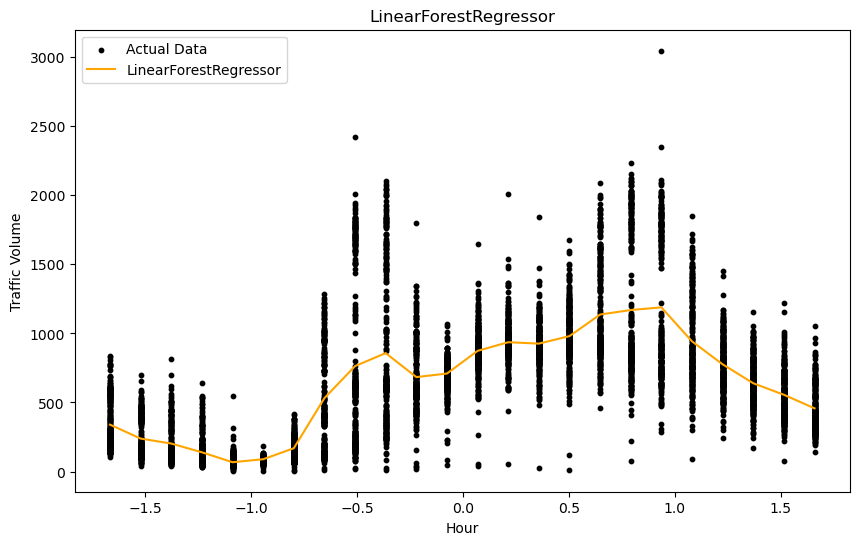

In [36]:
# Extract the 'Hour' feature from the original X DataFrame
hour_index = X.columns.get_loc('Hour')  # Get the index of the 'Hour' column
hour_feature = X_test[:, hour_index]    # Extract 'Hour' from the scaled NumPy array

# Create a DataFrame for plotting
plot_df_forest = pd.DataFrame({
    'Hour': hour_feature,
    'Actual': y_test.values,        
    'Predicted': y_pred_forest
})

# Group by Hour for better visualization
plot_df_grouped = plot_df_forest.groupby('Hour').mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(plot_df_forest['Hour'], plot_df_forest['Actual'], c='black', s=10, label='Actual Data')
plt.plot(plot_df_grouped['Hour'], plot_df_grouped['Predicted'], color='orange', label='LinearForestRegressor')
plt.title('LinearForestRegressor')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


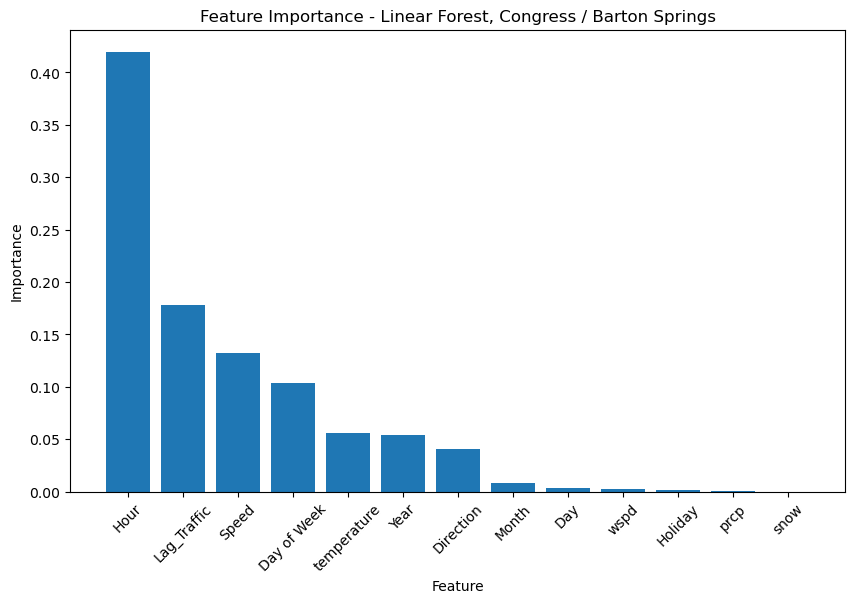

In [93]:
# plot feature importance
feature_importances = linear_forest.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importances)[::-1]  # Sort indices in descending order
sorted_feature_importance = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Linear Forest, Congress / Barton Springs')
plt.xticks(rotation=45)
plt.show()

# BURNET RUTLAND

In [51]:
df5 = data[data['Intersection Name'] == 'BurnetRutland']

In [52]:
df5.isna().sum()

Intersection Name     0
Month                 0
Day                   0
Year                  0
Hour                  0
Day of Week           0
Holiday               0
Direction             0
Speed                 0
Volume                0
Full Date             0
date                  0
tavg                  0
tmin                  0
tmax                  0
prcp                  0
snow                  0
wspd                  0
temperature           0
Lag_Traffic          16
dtype: int64

In [53]:
# drop the 16 rows where lag isnt filled in yet (2 directions x 8 hours)
df5 = df5.dropna()
df5.isna().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
temperature          0
Lag_Traffic          0
dtype: int64

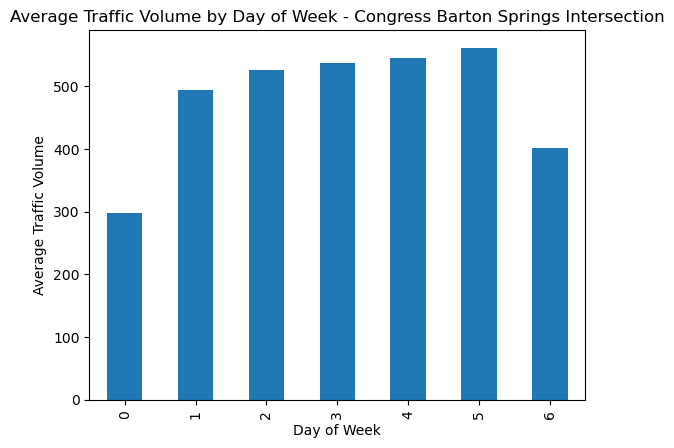

In [54]:
# plot average traffic volume by day of week
df5.groupby('Day of Week')['Volume'].mean().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of Week - Congress Barton Springs Intersection')
plt.show()

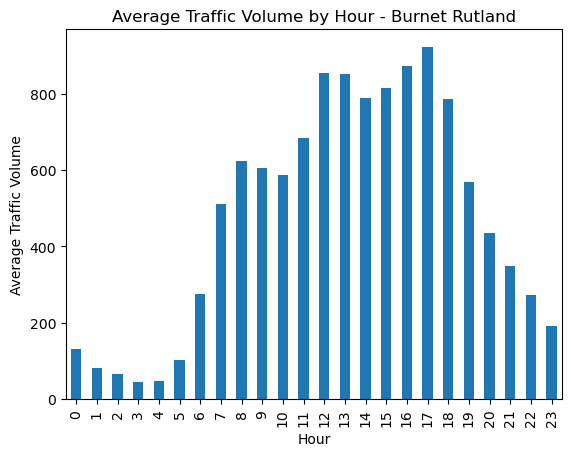

In [55]:
# plot average traffic volume by hour
df5.groupby('Hour')['Volume'].mean().plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour - Burnet Rutland')
plt.show()

In [62]:
df5 = df5.drop(['Full Date', 'date', 'tavg', 'tmin', 'tmax', 'Intersection Name'], axis=1)
df5.head()

,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,prcp,snow,wspd,temperature,Lag_Traffic
129296,8,18,2017,20,5,0,NB,41.0,593.0,0.0,0,7.9,33.593501,562.0
129294,8,18,2017,21,5,0,NB,39.0,529.0,0.0,0,7.9,31.950000,1408.0
129292,8,18,2017,22,5,0,NB,40.0,413.0,0.0,0,7.9,30.306499,1012.0
129290,8,18,2017,23,5,0,NB,40.0,297.0,0.0,0,7.9,28.775000,975.0
129288,8,19,2017,0,6,0,NB,41.0,238.0,0.0,0,6.8,26.435608,1249.0


In [64]:
label_encoder = LabelEncoder()
df5['Direction'] = label_encoder.fit_transform(df5['Direction'])

In [66]:
X = df5.drop('Volume', axis=1)
y = df5['Volume']

In [67]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    bootstrap=True,          # Use bootstrapped samples for training
    random_state=42          # Random seed for reproducibility
)

In [70]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_pred = rf_regressor.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RF Mean Squared Error: {mse}")
print(f"RF Root Mean Squared Error: {rmse}")
print(f"RF R-squared: {r2}")

RF Mean Squared Error: 4266.207594286289
RF Root Mean Squared Error: 65.31621233879295
RF R-squared: 0.966395370038175


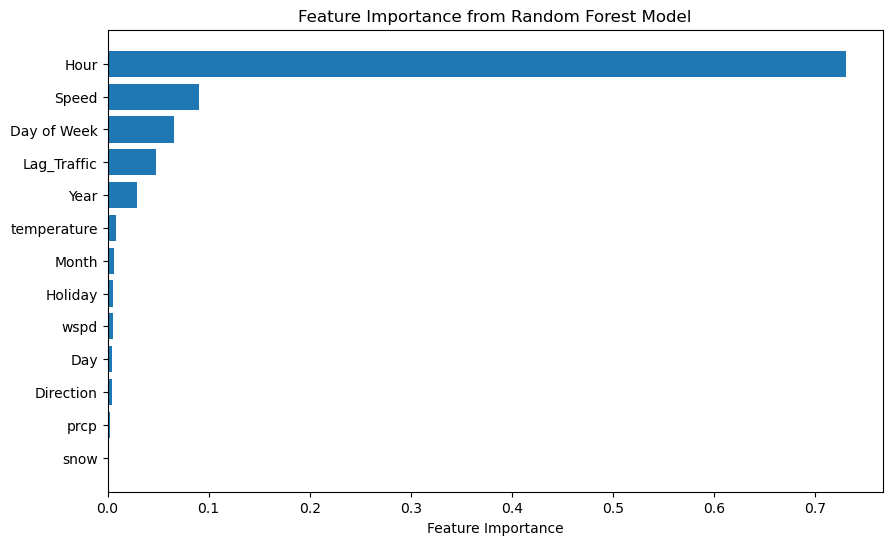

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance and feature names
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importance values and corresponding feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


## Linear Tree 

In [74]:
# Split features: Categorical features for logical splitting
categorical_features = ['Holiday', 'Direction']

split_features = ['Day of Week', 'Hour']

# Linear features: Continuous features for linear modeling
linear_features = ['Speed', 'prcp', 'snow', 'wspd', 'Hour', 'Day of Week', 'temperature', 'Lag_Traffic']

In [75]:
# Map feature names to indices for split_features and linear_features
categorical_features_indices = [X.columns.get_loc(feature) for feature in categorical_features]
split_feature_indices = [X.columns.get_loc(feature) for feature in split_features]
linear_feature_indices = [X.columns.get_loc(feature) for feature in linear_features]

In [76]:
# Step 3: Initialize and Train the LinearTreeRegressor
# Base estimator is LinearRegression
linear_tree = LinearTreeRegressor(
    base_estimator=LinearRegression(),
    criterion="rmse",              # Use RMSE for split quality
    max_depth= 20,                   # Limit tree depth to prevent overfitting
    min_samples_split=10,          # Minimum samples to allow a split
    min_samples_leaf=200,            # Minimum samples in a leaf
    split_features=split_feature_indices,  # Features to use for splits
    linear_features=linear_feature_indices, # Features to use in the linear models
    categorical_features=categorical_features_indices
)

In [77]:
# Train the model
linear_tree.fit(X_train, y_train)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[5, 6], criterion='rmse',
                    linear_features=[7, 8, 9, 10, 3, 4, 11, 12], max_depth=20,
                    min_samples_leaf=200, min_samples_split=10,
                    split_features=[4, 3])

In [78]:
# Step 4: Evaluate the Model
# Predict on the test set
y_pred = linear_tree.predict(X_test)
y_pred_linear_tree = linear_tree.predict(X_test)

In [79]:
# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R^2: {r2}")

Test RMSE: 128.9449148970809
Test R^2: 0.8690318862188342


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:

hour_feature = X_test[:, split_feature_indices[1]] 

# Create a DataFrame for easier plotting
import pandas as pd
plot_df = pd.DataFrame({
    'Hour': hour_feature,
    'Actual': y_test,
    'Predicted': y_pred_linear_tree
})

# group by hour to get mean volume per hour 
plot_df_grouped = plot_df.groupby('Hour').mean().reset_index()


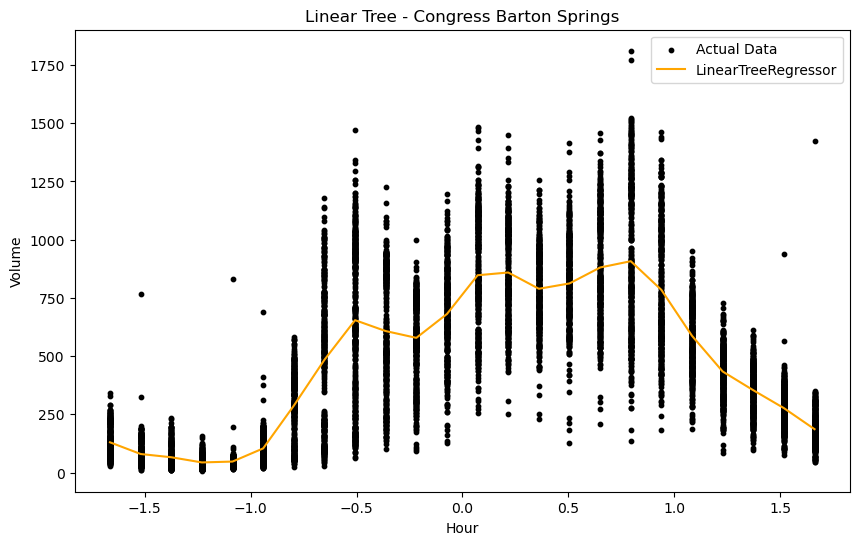

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(plot_df['Hour'], plot_df['Actual'], c='black', s=10, label='Actual Data')

# Line plot for predicted values
plt.plot(plot_df_grouped['Hour'], plot_df_grouped['Predicted'], color='orange', label='LinearTreeRegressor')

plt.title('Linear Tree - Congress Barton Springs')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.legend()
plt.show()


<ErrorbarContainer object of 3 artists>

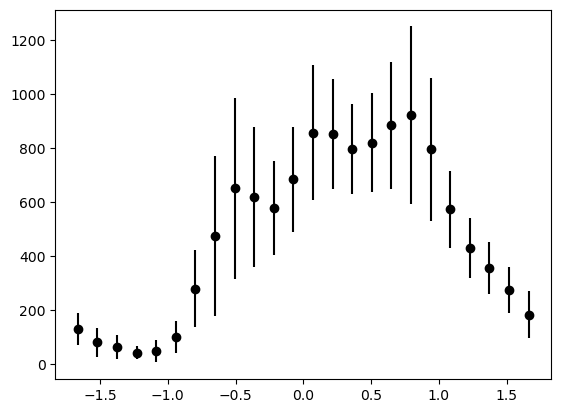

In [82]:
# Calculate standard deviation of 'Actual' for error bars
plot_df_grouped['Std'] = plot_df.groupby('Hour')['Actual'].std().values

# Add error bars
plt.errorbar(
    plot_df_grouped['Hour'], plot_df_grouped['Actual'],
    yerr=plot_df_grouped['Std'], fmt='o', color='black', label='Actual Data (Std Dev)'
)


## Linear Forest - Burnet Rutland

In [83]:
# Initialize LinearForestRegressor
linear_forest = LinearForestRegressor(
    base_estimator=Ridge(alpha=10.0),  # ridge as base
    n_estimators=300,                 # num trees
    max_features = None,
    max_depth=20,                    
    min_samples_split=20,          
    min_samples_leaf=20,      
    bootstrap=True,         
    n_jobs=-1                
)

In [84]:
# Fit the model
linear_forest.fit(X_train, y_train)

LinearForestRegressor(base_estimator=Ridge(alpha=10.0), max_depth=20,
                      max_features=None, min_samples_leaf=20,
                      min_samples_split=20, n_estimators=300, n_jobs=-1)

In [85]:
# Predict on test data
y_pred_forest = linear_forest.predict(X_test)

# Evaluate performance
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"LinearForestRegressor RMSE: {rmse_forest}")
print(f"LinearForestRegressor R^2: {r2_forest}")


LinearForestRegressor RMSE: 84.65069164990864
LinearForestRegressor R^2: 0.9435559516897322


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


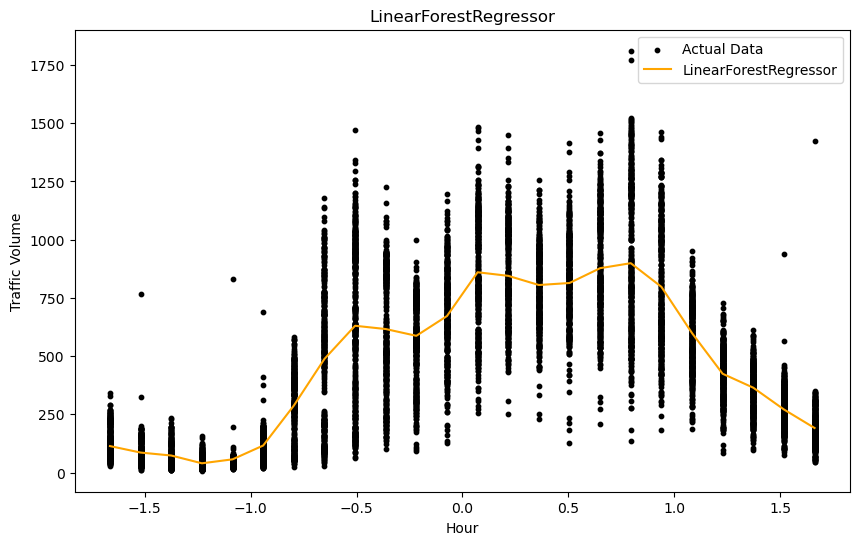

In [86]:
# Extract the 'Hour' feature from the original X DataFrame
hour_index = X.columns.get_loc('Hour')  # Get the index of the 'Hour' column
hour_feature = X_test[:, hour_index]    # Extract 'Hour' from the scaled NumPy array

# Create a DataFrame for plotting
plot_df_forest = pd.DataFrame({
    'Hour': hour_feature,
    'Actual': y_test.values,        
    'Predicted': y_pred_forest
})

# Group by Hour for better visualization
plot_df_grouped = plot_df_forest.groupby('Hour').mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(plot_df_forest['Hour'], plot_df_forest['Actual'], c='black', s=10, label='Actual Data')
plt.plot(plot_df_grouped['Hour'], plot_df_grouped['Predicted'], color='orange', label='LinearForestRegressor')
plt.title('LinearForestRegressor')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


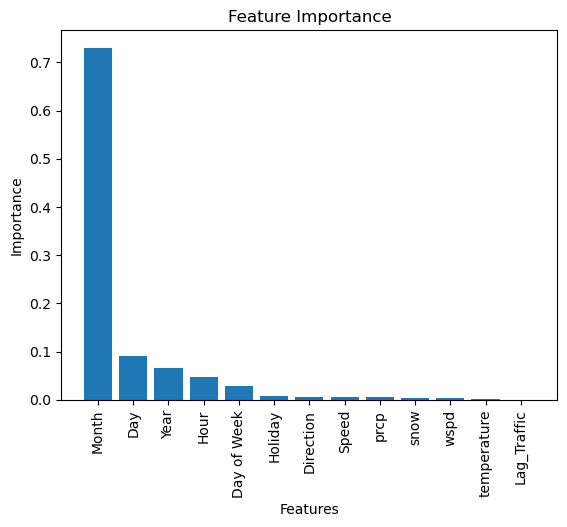

In [89]:
# plot feature importance
feature_importances = linear_forest.feature_importances_
feature_names = X.columns

# sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
feature_names = feature_names[sorted_idx]
feature_importance = feature_importance[sorted_idx]

plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## Grid Search to Find Best Params

In [56]:
# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],            # Number of trees in the ensemble
#     'max_depth': [15, 20, 25],                 # Depth of the trees
#     'min_samples_split': [10, 20, 50],         # Minimum samples for a split
#     'min_samples_leaf': [20, 50, 100],         # Minimum samples in a leaf
#     'max_features': [5, 10, None],             # Maximum number of features to consider for splits
#     'base_estimator__alpha': [0.1, 1.0, 10.0]  # Regularization strength for Ridge regression
# }


In [57]:
# # Initialize the model
# linear_forest = LinearForestRegressor(
#     base_estimator=Ridge(),
#     bootstrap=True,
#     n_jobs=-1
# )


In [58]:
# scoring = make_scorer(mean_squared_error, greater_is_better=False)


In [59]:
# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=linear_forest,
#     param_grid=param_grid,
#     scoring=scoring,
#     cv=3,               # 3-fold cross-validation
#     verbose=2,          # Output progress
#     n_jobs=-1           # Parallelize the grid search
# )

# # Fit the grid search on the training data
# grid_search.fit(X_train, y_train)


In [60]:
# # Best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Best model
# best_model = grid_search.best_estimator_

# # Evaluate on the test set
# y_pred_best = best_model.predict(X_test)
# rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
# print(f"Test RMSE with Best Parameters: {rmse_best}")


In [61]:
# # Plot actual vs predicted traffic volumes
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_best, alpha=0.5)
# plt.xlabel("Actual Volume")
# plt.ylabel("Predicted Volume")
# plt.title("Actual vs Predicted Traffic Volume")
# plt.show()
